In [1]:
library(miloR)
library(SingleCellExperiment)
library(scater)
library(dplyr)
library(patchwork)

Loading required package: edgeR

Loading required package: limma

Loading required package: SummarizedExperiment

Loading required package: MatrixGenerics

Loading required package: matrixStats


Attaching package: ‘MatrixGenerics’


The following objects are masked from ‘package:matrixStats’:

    colAlls, colAnyNAs, colAnys, colAvgsPerRowSet, colCollapse,
    colCounts, colCummaxs, colCummins, colCumprods, colCumsums,
    colDiffs, colIQRDiffs, colIQRs, colLogSumExps, colMadDiffs,
    colMads, colMaxs, colMeans2, colMedians, colMins, colOrderStats,
    colProds, colQuantiles, colRanges, colRanks, colSdDiffs, colSds,
    colSums2, colTabulates, colVarDiffs, colVars, colWeightedMads,
    colWeightedMeans, colWeightedMedians, colWeightedSds,
    colWeightedVars, rowAlls, rowAnyNAs, rowAnys, rowAvgsPerColSet,
    rowCollapse, rowCounts, rowCummaxs, rowCummins, rowCumprods,
    rowCumsums, rowDiffs, rowIQRDiffs, rowIQRs, rowLogSumExps,
    rowMadDiffs, rowMads, rowMaxs, rowMeans2, rowMedi

In [2]:
obj = qs::qread('../00_preprocessing/_targets/objects/exp_other_obob')
obj

Loading required package: SeuratObject

Attaching sp


Attaching package: ‘SeuratObject’


The following object is masked from ‘package:SummarizedExperiment’:

    Assays


Loading required package: Seurat


Attaching package: ‘Seurat’


The following object is masked from ‘package:SummarizedExperiment’:

    Assays




An object of class Seurat 
56583 features across 28456 samples within 3 assays 
Active assay: SCT (24262 features, 3000 variable features)
 2 other assays present: RNA, integrated
 2 dimensional reductions calculated: pca, umap

In [3]:
sce = as.SingleCellExperiment(obj)
sce

class: SingleCellExperiment 
dim: 24262 28456 
metadata(0):
assays(2): counts logcounts
rownames(24262): Lypla1 Tcea1 ... Olfr187 ENSMUSG00000100896
rowData names(0):
colnames(28456): CCTATCGAGCCATTCA_1_1 GTCCTCAAGCGAGGAG_1_1 ...
  TTAATCCGTGATAGTA_5_3 TCACTCGAGGATACCG_5_3
colData names(35): orig.ident nCount_RNA ... labels ident
reducedDimNames(2): PCA UMAP
mainExpName: SCT
altExpNames(2): RNA integrated

In [4]:
milo_obj = Milo(sce)

In [5]:
milo_obj <- buildGraph(milo_obj, k = 30, d = 30, reduced.dim = "PCA")

Constructing kNN graph with k:30



In [6]:
milo_obj <- makeNhoods(milo_obj, prop = 0.1, k = 30, d=30, refined = TRUE, reduced_dims = "PCA")

Checking valid object

Running refined sampling with reduced_dim



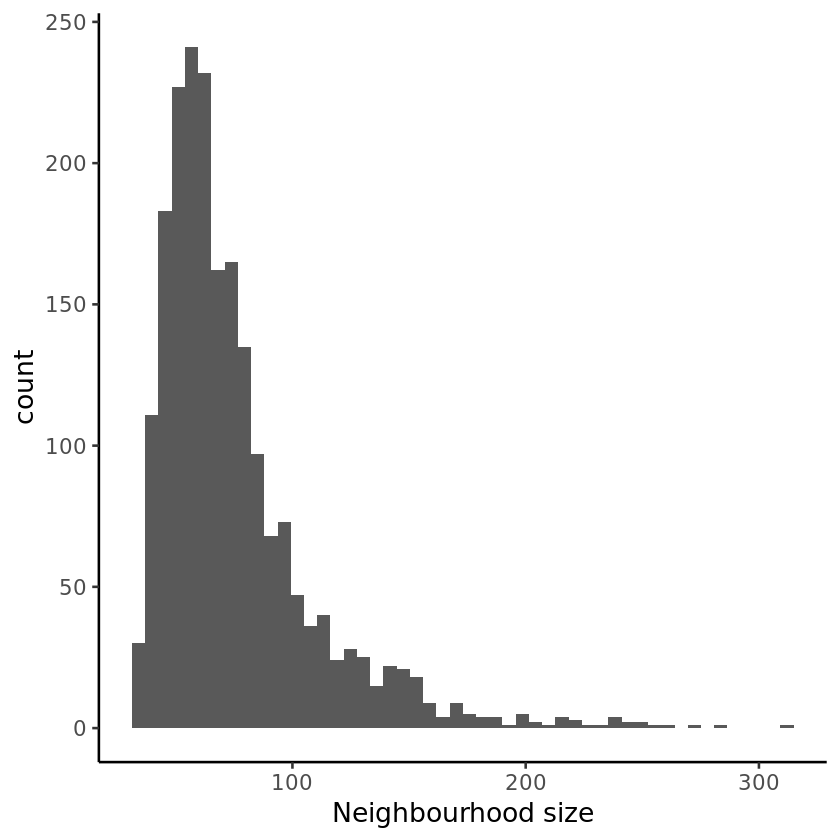

In [7]:
plotNhoodSizeHist(milo_obj)

In [8]:
meta = data.frame(colData(milo_obj))
meta = meta %>% mutate(batch = stringr::str_replace_all(batch, stringr::fixed(" "), '__'))
head(meta)

,orig.ident,nCount_RNA,nFeature_RNA,Index.10x,nCount_HTO,nFeature_HTO,Index.HTO,nCount_spliced,nFeature_spliced,nCount_unspliced,⋯,strain,treatment,time,collection_date,isolation_date,batch,predicted.id,prediction.score.max,labels,ident
,<chr>,<dbl>,<int>,<chr>,<dbl>,<int>,<chr>,<dbl>,<int>,<dbl>,⋯,<fct>,<fct>,<fct>,<fct>,<fct>,<chr>,<chr>,<dbl>,<fct>,<fct>
CCTATCGAGCCATTCA_1_1,SI-TT-A11,49695,7017,SI-TT-A11,1473,12,D706,7105,3206,42590,⋯,obob,FGF1,Day14,220407,22/6/2022,Batch__1,NG2_OPC2,0.3917772,NG2_OPC2-Microglia,12
GTCCTCAAGCGAGGAG_1_1,SI-TT-A11,41375,6414,SI-TT-A11,2757,12,D706,6392,2838,34983,⋯,obob,FGF1,Day5,211213,22/6/2022,Batch__1,NFOL,1.0000000,NFOL,13
AAGGTAATCTGAGGCC_1_1,SI-TT-A11,40000,6407,SI-TT-A11,1678,12,D706,5088,2532,34912,⋯,obob,FGF1,Day14,220131,22/6/2022,Batch__1,NG2_OPC2,0.9625983,NG2_OPC2-Microglia,12
TCCGTGTCACCTGTCT_1_1,SI-TT-A11,39270,6913,SI-TT-A11,1516,12,D706,6058,2883,33212,⋯,obob,FGF1,Day14,220407,22/6/2022,Batch__1,Parstuber2A,0.2406799,NG2_OPC2-Microglia,12
CTTCGGTTCAGCTGAT_1_1,SI-TT-A11,40118,5968,SI-TT-A11,2558,12,D706,7081,2634,33037,⋯,obob,FGF1,Day5,211213,22/6/2022,Batch__1,NFOL,0.9833581,NFOL,13
TCTAACTCAATCTCGA_1_1,SI-TT-A11,35178,6131,SI-TT-A11,1966,12,D706,4758,2406,30420,⋯,obob,FGF1,Day14,220131,22/6/2022,Batch__1,NG2_OPC2,0.4448438,NG2_OPC2-Microglia,12


In [9]:
colData(milo_obj)$group = interaction(meta$treatment, meta$time)
colData(milo_obj)$batch = meta$batch

In [10]:
meta$batch %>% head

[1] "Batch__1" "Batch__1" "Batch__1" "Batch__1" "Batch__1" "Batch__1"

In [11]:
milo_obj <- countCells(milo_obj, meta.data = data.frame(colData(milo_obj)), sample="hash.mcl.ID")

Checking meta.data validity

Counting cells in neighbourhoods



In [12]:
head(nhoodCounts(milo_obj))

   [[ suppressing 28 column names ‘M13’, ‘N7’, ‘J11’ ... ]]



6 x 28 sparse Matrix of class "dgCMatrix"
                                                                  
1 9 3 4 9 7 5 4 . 2 11 3 24 12 6 22 12 20 6 10  1 3 7 1 6 7 12 9 3
2 3 3 4 3 . 3 2 2 1  4 1  2  3 4  3  2  6 3  1  3 . . 3 1 7  . 3 1
3 1 6 1 1 2 1 . 3 2  . 1  .  3 1  1  2  2 .  3  2 4 . 2 2 .  1 1 2
4 4 . 1 6 4 6 7 1 1  2 6  .  4 1  2  .  3 2  1  4 . 2 1 6 6  1 4 9
5 . 1 2 2 2 2 . 8 .  1 2  2  7 2  .  2  3 .  2  2 . 4 1 1 6  2 1 3
6 3 . 1 2 . 2 2 . 3  1 1  2  1 6  .  1  . 2  . 19 . 4 2 . 4  1 2 9

In [78]:
design_df <- data.frame(colData(milo_obj))[,c("hash.mcl.ID", "group", "batch")]
design_df <- distinct(design_df)
rownames(design_df) <- design$hash.mcl.ID
design_df <- design_df[colnames(nhoodCounts(milo_obj)), , drop=FALSE]
design_df

,hash.mcl.ID,group,batch
,<chr>,<fct>,<chr>
M13,M13,FGF1.Day14,Batch__1
N7,N7,FGF1.Day5,Batch__1
J11,J11,FGF1.Day14,Batch__1
M8,M8,Veh_PF.Day5,Batch__1
J2,J2,Veh_PF.Day14,Batch__1
M24,M24,Veh_PF.Day14,Batch__1
N8,N8,Veh_PF.Day5,Batch__1
M9,M9,FGF1.Day5,Batch__1
N17,N17,FGF1.Day5,Batch__2


In [140]:
design$group %>% unique

[1] FGF1.Day14   FGF1.Day5    Veh_PF.Day5  Veh_PF.Day14
Levels: FGF1.Day14 Veh_PF.Day14 FGF1.Day5 Veh_PF.Day5

In [141]:
contrast.all <- c("groupFGF1.Day14-groupVeh_PF.Day14")

# this is the edgeR code called by `testNhoods`
model <- model.matrix(~ 0 + group + batch, data=design_df)
mod.constrast <- makeContrasts(contrasts=contrast.all, levels=model)
mod.constrast

,groupFGF1.Day14-groupVeh_PF.Day14
groupFGF1.Day14,1
groupVeh_PF.Day14,-1
groupFGF1.Day5,0
groupVeh_PF.Day5,0
batchBatch__2,0
batchBatch__3,0


In [142]:
model

,groupFGF1.Day14,groupVeh_PF.Day14,groupFGF1.Day5,groupVeh_PF.Day5,batchBatch__2,batchBatch__3
M13,1,0,0,0,0,0
N7,0,0,1,0,0,0
J11,1,0,0,0,0,0
M8,0,0,0,1,0,0
J2,0,1,0,0,0,0
M24,0,1,0,0,0,0
N8,0,0,0,1,0,0
M9,0,0,1,0,0,0
N17,0,0,1,0,1,0
M10,0,0,1,0,1,0


In [41]:
milo_obj <- calcNhoodDistance(milo_obj, d=30, reduced.dim = "PCA")

In [114]:
# da_results <- testNhoods(milo_obj, design = ~ batch + group, design.df = design_df, model.contrasts = mod.constrast, fdr.weighting = "graph-overlap")
da_results <- testNhoods(milo_obj, design = ~ batch + group, design.df = design)

Using TMM normalisation

Performing spatial FDR correction withk-distance weighting



In [115]:
da_results

,logFC,logCPM,F,PValue,FDR,Nhood,SpatialFDR
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,-0.27109031,10.765983,0.313354986,0.57563145,0.9087772,1,0.9746183
2,-1.69713855,9.672916,5.994861261,0.01435136,0.4254028,2,0.6958577
3,0.19473486,9.371800,0.047772413,0.82698678,0.9709137,3,0.9898928
4,0.47094960,9.828654,0.601648097,0.43795393,0.8587108,4,0.9629924
5,-0.16752197,9.536281,0.058860524,0.80830717,0.9709137,5,0.9898928
6,-1.13243931,9.652889,3.206787572,0.07333998,0.5862815,6,0.8152718
7,0.90373878,9.688284,1.880174829,0.17032251,0.7270378,7,0.9049490
8,-0.75959191,9.395201,1.145010535,0.28460174,0.7846701,8,0.9252352
9,-0.41061410,9.903349,0.401220262,0.52646292,0.8962432,9,0.9746183


In [116]:
table(da_results$SpatialFDR < 0.1)


FALSE  TRUE 
 2061     5 

In [117]:
da_results %>%
  arrange(SpatialFDR) %>%
  head()

,logFC,logCPM,F,PValue,FDR,Nhood,SpatialFDR
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
195,-4.268957,9.690416,28.02848,1.200968e-07,0.000248120,195,0.0006454644
1557,-3.744334,9.517002,23.57234,1.207034e-06,0.001246866,1557,0.0032934881
1403,-3.094583,9.736759,16.49505,4.885904e-05,0.024863142,1403,0.0555338575
1491,3.968294,9.320496,16.86733,4.018381e-05,0.024863142,1491,0.0555338575
1167,-3.483416,9.382086,16.10025,6.017217e-05,0.024863142,1167,0.0584483132
233,-3.488102,9.241753,12.42016,4.253087e-04,0.146447979,233,0.3511529544


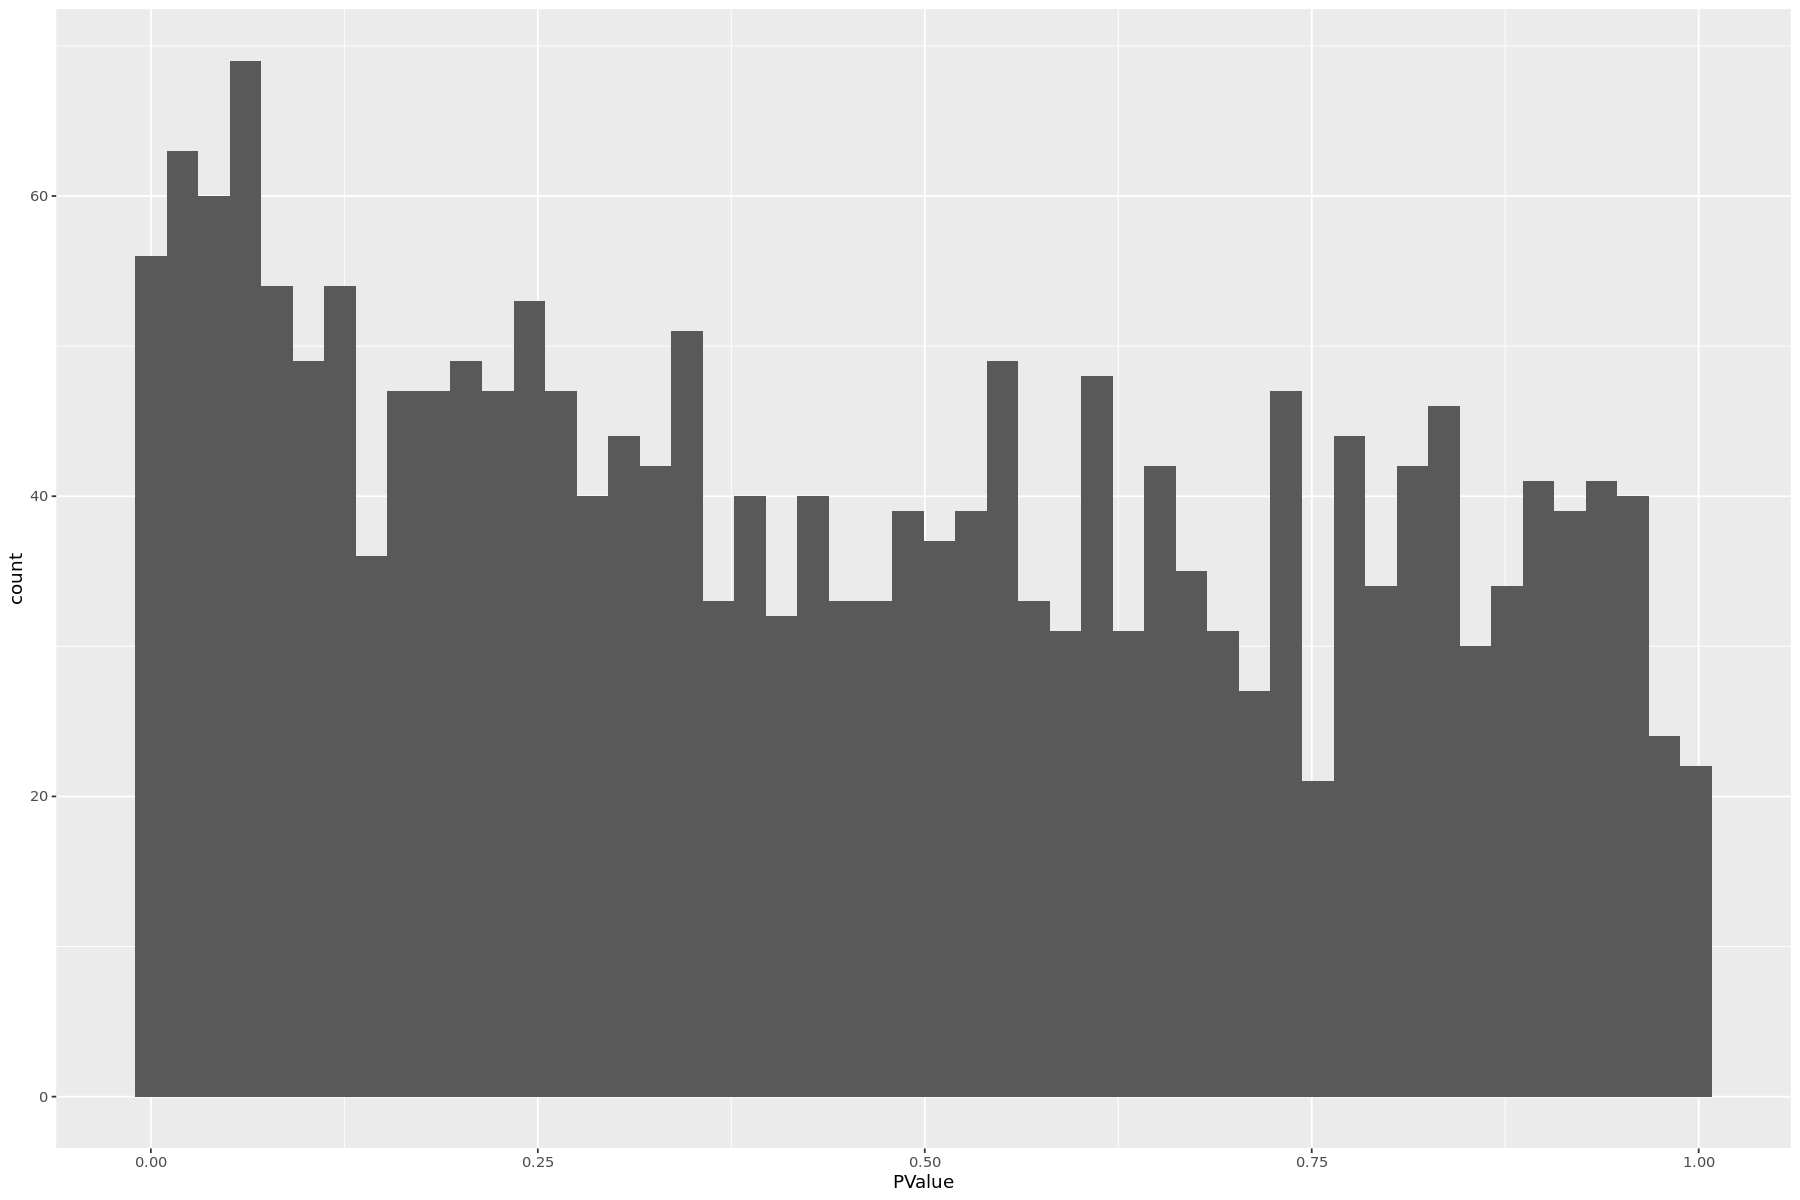

In [118]:
ggplot(da_results, aes(PValue)) + geom_histogram(bins=50)

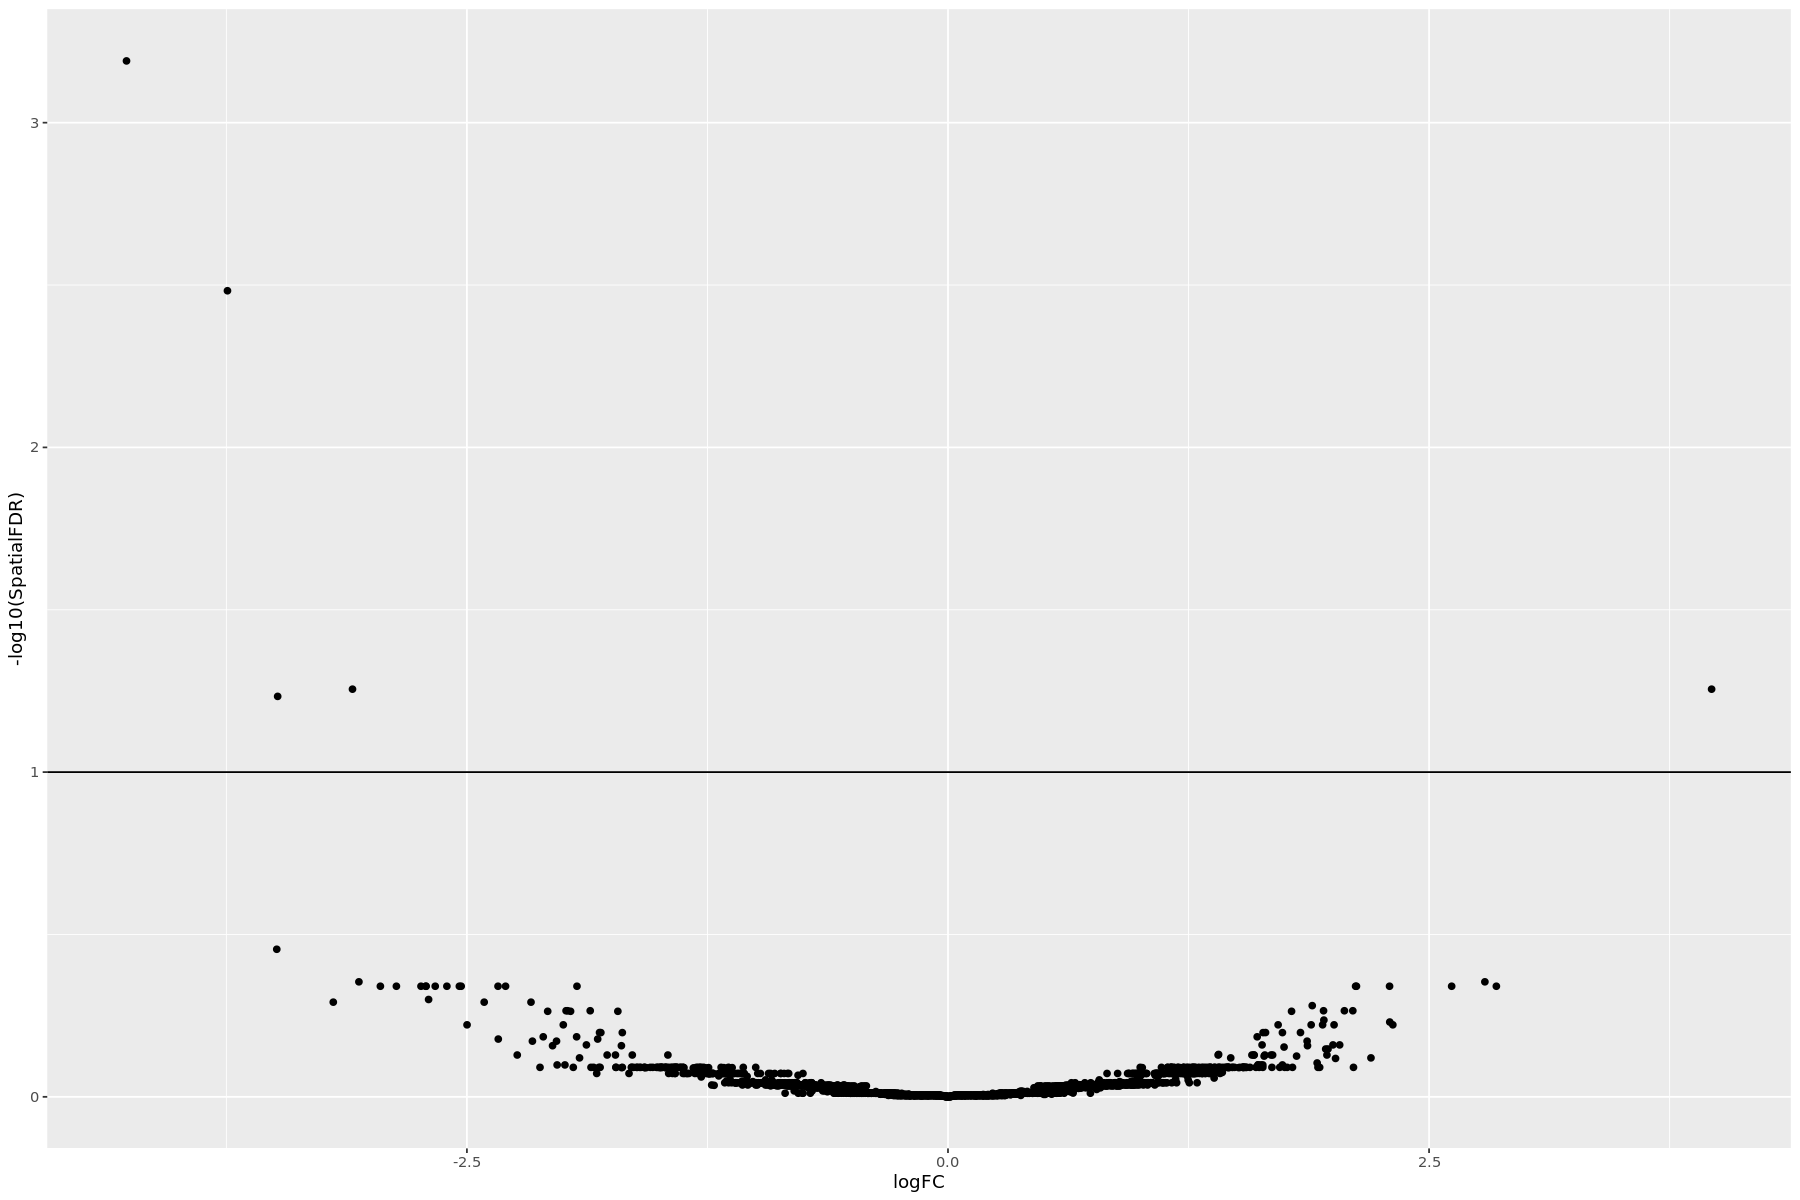

In [119]:
ggplot(da_results, aes(logFC, -log10(SpatialFDR))) +
  geom_point() +
  geom_hline(yintercept = 1) ## Mark significance threshold (10% FDR)

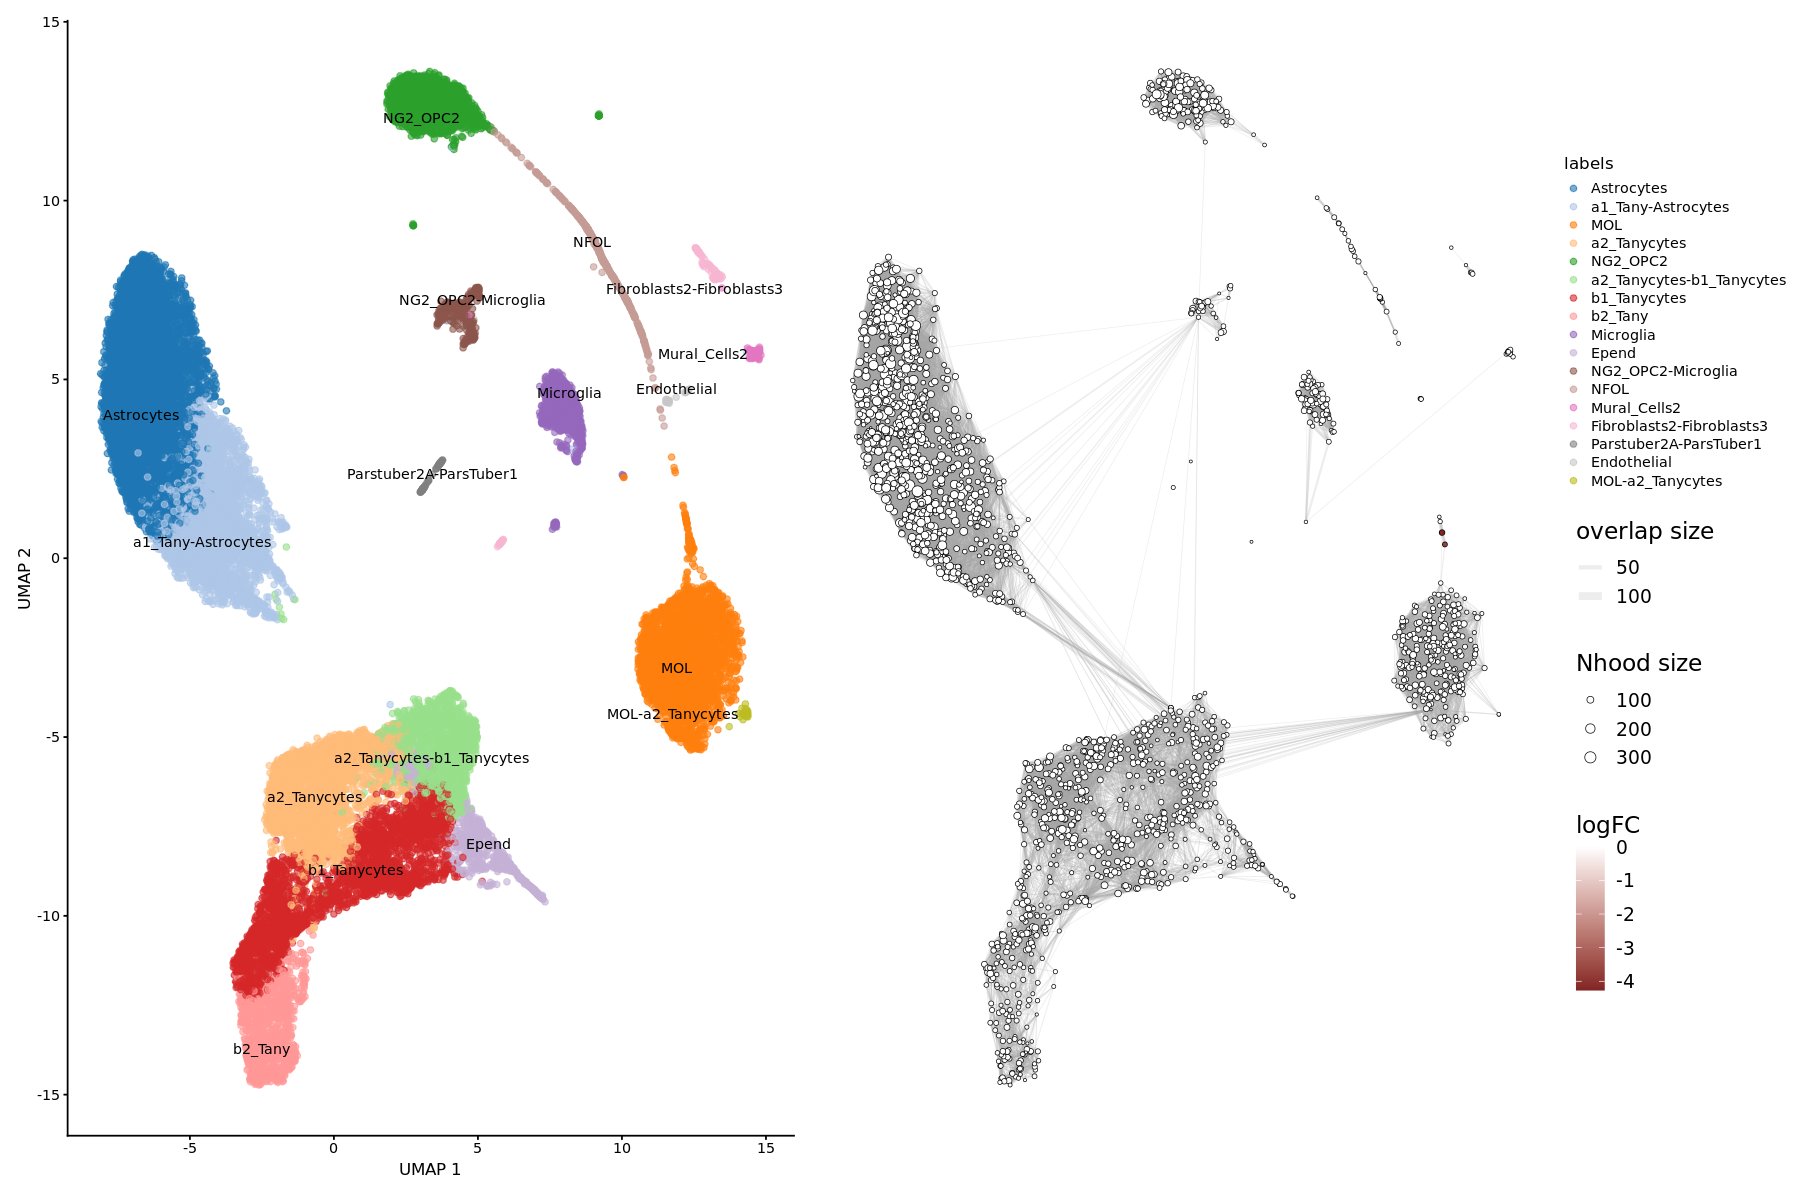

In [120]:
options(repr.plot.width=15, repr.plot.height=10)
milo_obj <- buildNhoodGraph(milo_obj)

## Plot single-cell UMAP
umap_pl <- plotReducedDim(milo_obj, dimred = "UMAP", colour_by="labels", text_by = "labels", text_size = 3) +
  guides(fill="none")

## Plot neighbourhood graph
nh_graph_pl <- plotNhoodGraphDA(milo_obj, da_results, layout="UMAP",alpha=0.05)

umap_pl + nh_graph_pl +
  plot_layout(guides="collect")

In [121]:
da_results <- annotateNhoods(milo_obj, da_results, coldata_col = "labels")
head(da_results)

,logFC,logCPM,F,PValue,FDR,Nhood,SpatialFDR,labels,labels_fraction
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
1,-0.2710903,10.765983,0.31335499,0.57563145,0.9087772,1,0.9746183,Astrocytes,1
2,-1.6971385,9.672916,5.99486126,0.01435136,0.4254028,2,0.6958577,MOL,1
3,0.1947349,9.371800,0.04777241,0.82698678,0.9709137,3,0.9898928,Microglia,1
4,0.4709496,9.828654,0.60164810,0.43795393,0.8587108,4,0.9629924,Astrocytes,1
5,-0.1675220,9.536281,0.05886052,0.80830717,0.9709137,5,0.9898928,b1_Tanycytes,1
6,-1.1324393,9.652889,3.20678757,0.07333998,0.5862815,6,0.8152718,MOL,1


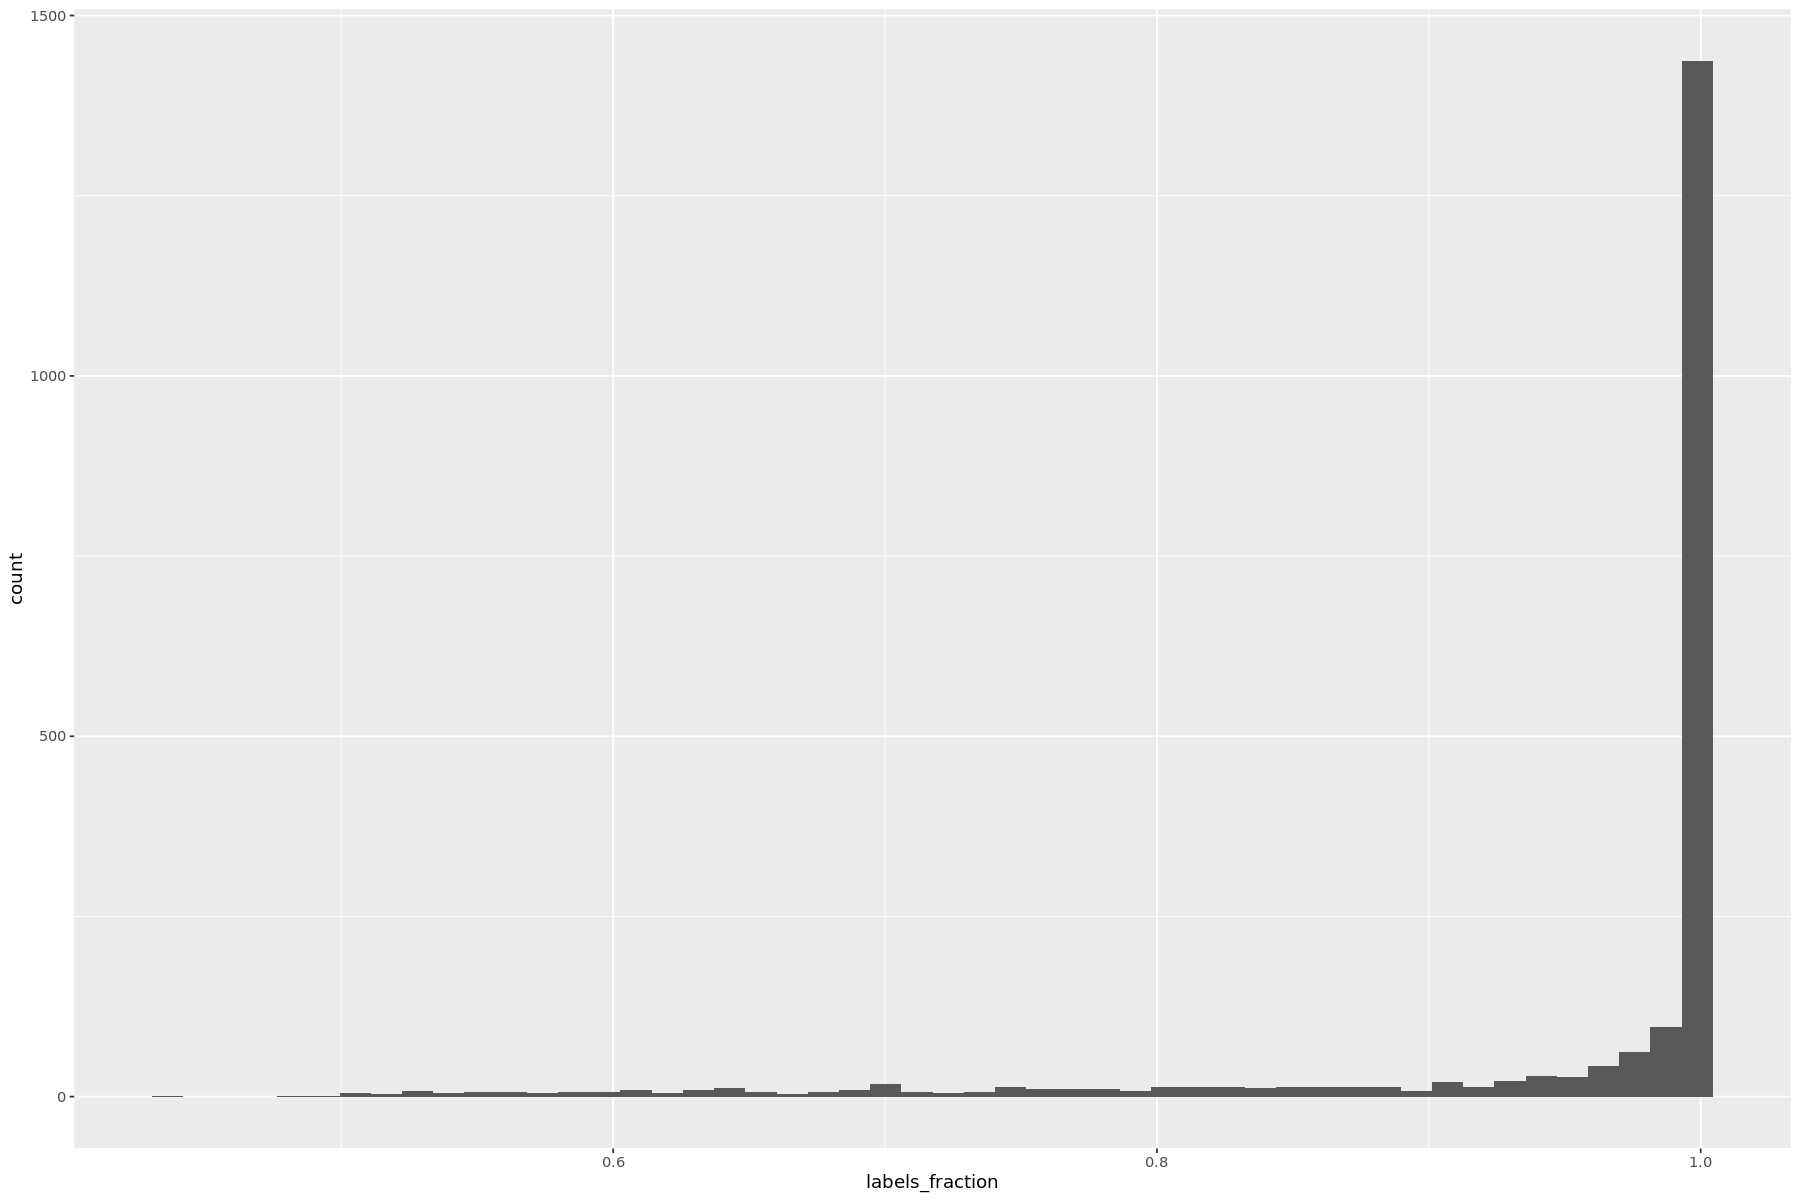

In [122]:
ggplot(da_results, aes(labels_fraction)) + geom_histogram(bins=50)

In [123]:
da_results$labels <- ifelse(da_results$labels_fraction < 0.6, "Mixed", da_results$labels)

In [124]:
da_results

,logFC,logCPM,F,PValue,FDR,Nhood,SpatialFDR,labels,labels_fraction
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
1,-0.27109031,10.765983,0.313354986,0.57563145,0.9087772,1,0.9746183,Astrocytes,1.0000000
2,-1.69713855,9.672916,5.994861261,0.01435136,0.4254028,2,0.6958577,MOL,1.0000000
3,0.19473486,9.371800,0.047772413,0.82698678,0.9709137,3,0.9898928,Microglia,1.0000000
4,0.47094960,9.828654,0.601648097,0.43795393,0.8587108,4,0.9629924,Astrocytes,1.0000000
5,-0.16752197,9.536281,0.058860524,0.80830717,0.9709137,5,0.9898928,b1_Tanycytes,1.0000000
6,-1.13243931,9.652889,3.206787572,0.07333998,0.5862815,6,0.8152718,MOL,1.0000000
7,0.90373878,9.688284,1.880174829,0.17032251,0.7270378,7,0.9049490,a2_Tanycytes,0.9866667
8,-0.75959191,9.395201,1.145010535,0.28460174,0.7846701,8,0.9252352,MOL,1.0000000
9,-0.41061410,9.903349,0.401220262,0.52646292,0.8962432,9,0.9746183,NG2_OPC2,1.0000000


In [125]:
# da_results$logFC = da_results$logCPM

Converting group.by to factor...



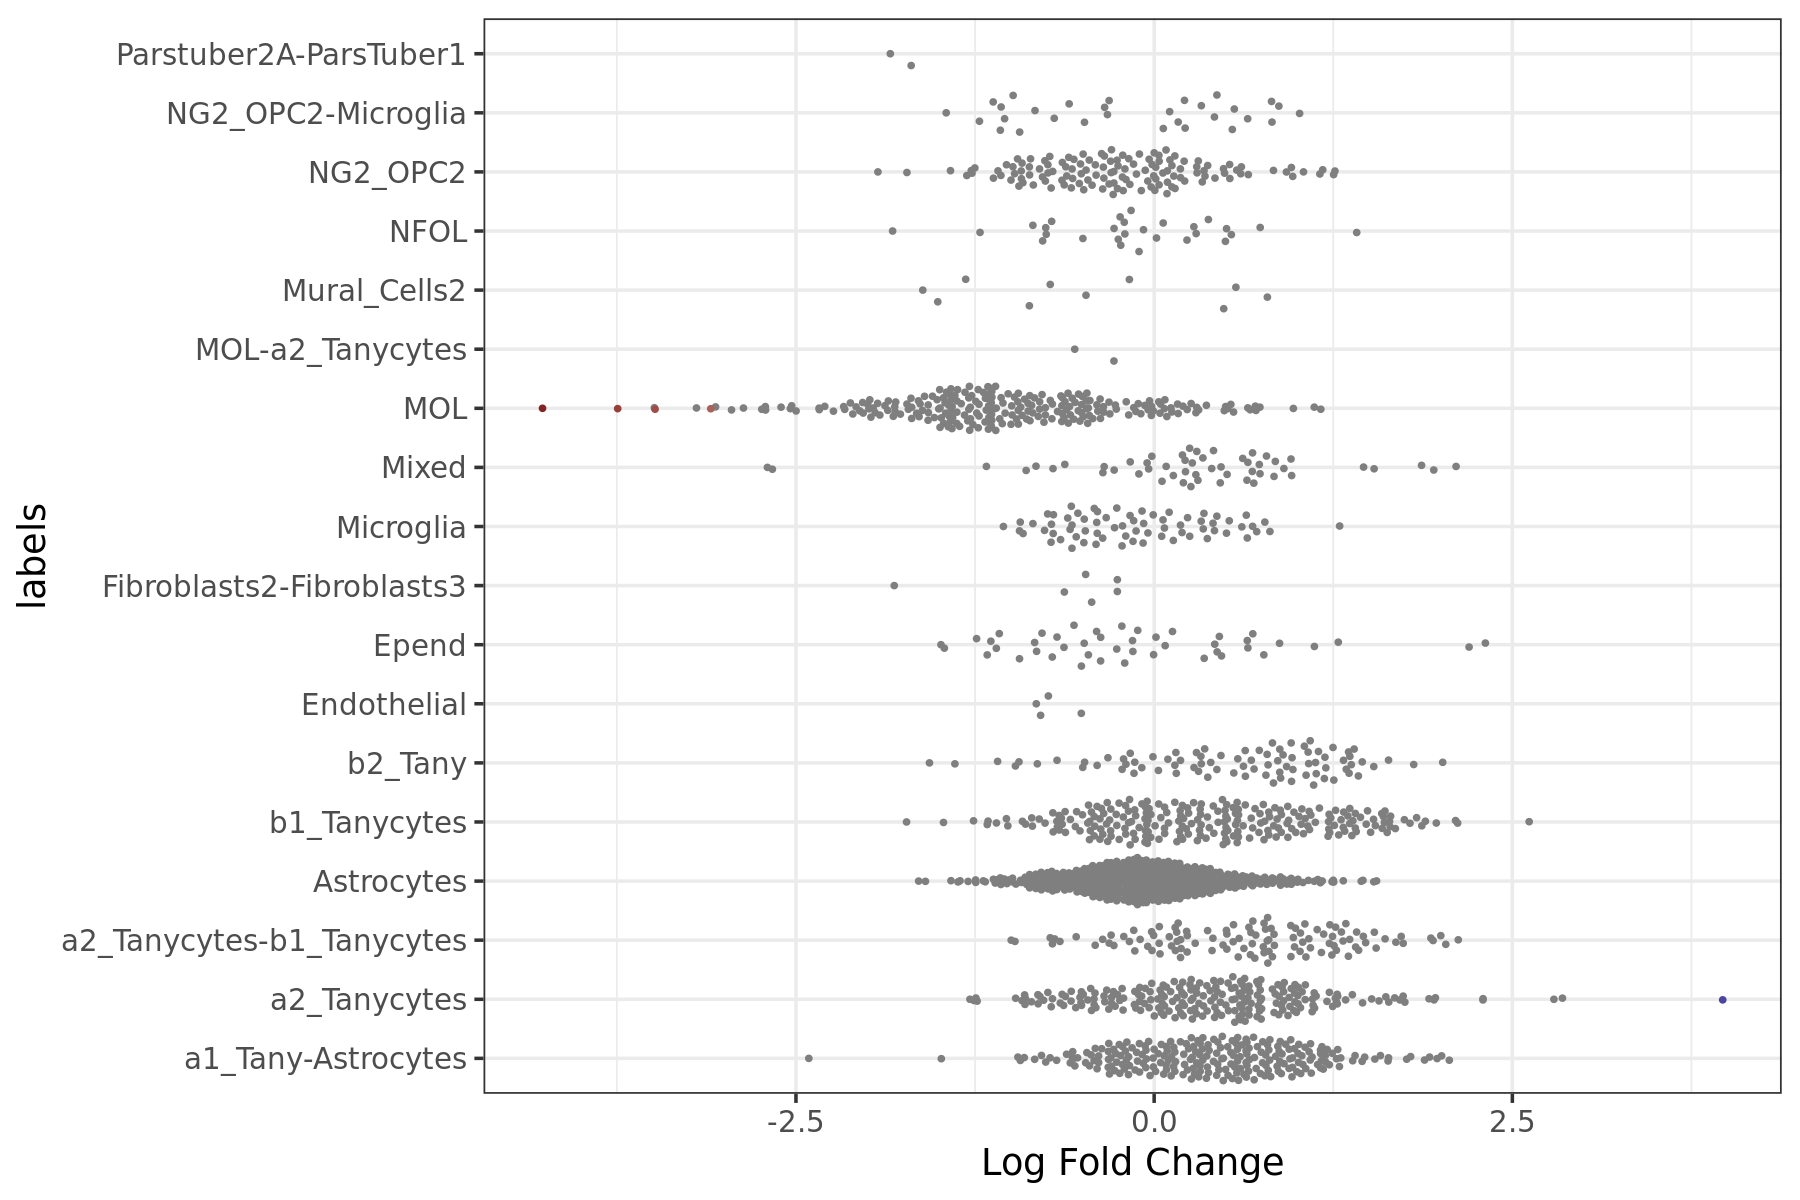

In [126]:
plotDAbeeswarm(da_results,group.by = "labels")